In [1]:
from LabData.DataLoaders.BodyMeasuresLoader import BodyMeasuresLoader

study_ids = [10, 1001, 1002]

bm = BodyMeasuresLoader().get_data(study_ids=study_ids)
df = bm.df
metadata = bm.df_metadata
age_gender = metadata[['age', 'gender', 'yob']]
print(df.head(3))
print(metadata.head(3))
print(age_gender.head(3))

                                            dominant_hand  fingers_grip_right  \
RegistrationCode Date                                                           
10K_1000942861   2021-12-13 09:14:42.516409         Right                 NaN   
10K_1001201093   2021-08-26 08:10:37.826755         Right                 NaN   
10K_1002033709   2022-08-03 08:38:38.933123         Right                 NaN   

                                             lying_blood_pressure_systolic  \
RegistrationCode Date                                                        
10K_1000942861   2021-12-13 09:14:42.516409                          139.0   
10K_1001201093   2021-08-26 08:10:37.826755                          100.0   
10K_1002033709   2022-08-03 08:38:38.933123                          106.0   

                                             body_temperature  \
RegistrationCode Date                                           
10K_1000942861   2021-12-13 09:14:42.516409               NaN   
10K_1001

In [7]:
import pandas as pd
import matplotlib.pyplot as plt
from LabData.DataLoaders.SubjectLoader import SubjectLoader
from LabData.DataLoaders.GutMBLoader import GutMBLoader
from LabData.DataLoaders.BodyMeasuresLoader import BodyMeasuresLoader
from LabData.DataLoaders.BloodTestsLoader import BloodTestsLoader
from LabData.DataLoaders.DietLoggingLoader import DietLoggingLoader
from LabData.DataLoaders.CGMLoader import CGMLoader
from LabData.DataLoaders.UltrasoundLoader import UltrasoundLoader
from LabData.DataLoaders.ABILoader import ABILoader
from LabData.DataLoaders.ItamarSleepLoader import ItamarSleepLoader
from LabData.DataLoaders.MedicalConditionLoader import MedicalConditionLoader
from LabData.DataLoaders.MedicalProceduresLoader import MedicalProceduresLoader
from LabData.DataLoaders.Medications10KLoader import Medications10KLoader
from LabData.DataLoaders.LifeStyleLoader import LifeStyleLoader
from LabData.DataLoaders.DemographicsLoader import DemographicsLoader
from LabData.DataLoaders.ECGTextLoader import ECGTextLoader
from LabData.DataLoaders.DEXALoader import DEXALoader
from LabData.DataLoaders.PRSLoader import PRSLoader
from LabData.DataLoaders.HormonalStatusLoader import HormonalStatusLoader
from LabData.DataLoaders.IBSTenkLoader import IBSTenkLoader
from LabData.DataLoaders.SerumMetabolomicsLoader import SerumMetabolomicsLoader
from LabData.DataLoaders.FamilyMedicalConditionsLoader import FamilyMedicalConditionsLoader
from LabData.DataLoaders.ChildrenLoader import ChildrenLoader
from LabData.DataLoaders.MentalLoader import MentalLoader
from LabData.DataLoaders.TimelineLoader import TimelineLoader
from LabData.DataLoaders.SubjectRelationsLoader import SubjectRelationsLoader
from LabData.DataLoaders.RetinaScanLoader import RetinaScanLoader
from LabData.DataLoaders.PAStepsLoader import PAStepsLoader


In [8]:
def define_the_range(x, dic_list, bad_big = True):
    if not type(x) == int and not type(x) == float:
        return
    elif not bad_big:
        x = -x
        dic_list = [-a for a in reversed(dic_list)]
    if type(dic_list[0])==tuple:
        if x>=dic_list[0][0] and x<=dic_list[0][1]:
            return 'normal'
        elif x<dic_list[0][0] or x>dic_list[0][1]:
            return 'abnormal'

    elif len(dic_list)==1:
        if x<=dic_list[0]:
            return 'normal'
        elif x>dic_list[0]:
            return 'abnormal'
    elif len(dic_list)==2:
        if x<=dic_list[0]:
            return 'normal'
        elif x<=dic_list[1]:
            return 'intermediate'
        elif x>dic_list[1]:
            return 'abnormal'

list of the relevant loaders and the amount participants

https://docs.google.com/spreadsheets/d/1Ky6BVDjsYtETRVLVbE_hROVoFXFUcB4-yspY6LDs1w0/edit?usp=sharing


get_data arguments:

relevant study_ids = [10, 1001, 1002]
----1001 - beilinson
---1002 - cancer
relevant research stages = ['baseline','00_01_visit', '00_02_visit','01_00_call','01_01_visit','02_00_visit',
                         '02_01_visit','02_02_visit','03_00_call','03_00_visit','03_01_visit']

In [5]:
study_ids = [10, 1001, 1002]


In [67]:
SubjectLoader().get_data(study_ids=study_ids).df[['age', 'yob', 'gender']]

,,age,yob,gender
RegistrationCode,Date,,,
10K_1000028368,2020-03-22 08:26:05.077073,54.0,1966.0,1
10K_1000273395,2020-03-05 20:53:54.399388,41.0,1979.0,1
10K_1000633050,2021-06-21 14:23:50.372010,66.0,1955.0,0
10K_1000942861,2021-06-11 11:30:37.386358,54.0,1967.0,1
10K_1001201093,2021-08-21 14:12:32.358214,42.0,1979.0,0
...,...,...,...,...
10K_9998418497,2019-09-22 11:19:56.682834,46.0,1973.0,0
10K_9998896533,2021-06-14 10:23:53.162146,67.0,1954.0,1
10K_9999226141,2019-12-04 07:07:07.815688,41.0,1978.0,1


## Basic Data

In [65]:
bm = BodyMeasuresLoader().get_data(study_ids=study_ids, groupby_reg='first').df.join(BodyMeasuresLoader().get_data(study_ids=study_ids, groupby_reg='first').df_metadata)

age_gender = bm[['age', 'gender', 'yob']].reset_index().set_index('RegistrationCode')
del age_gender['Date']
age_gender = age_gender[~age_gender['gender'].isna()]
age_gender = age_gender[~age_gender['age'].isna()]

gender_dictionary = {1:'male', 0:'female'}

age_gender.loc[:,'gender'] = age_gender['gender'].fillna(0).map(gender_dictionary)

age_gender.head(10)

,age,gender,yob
RegistrationCode,,,
10K_1000942861,54.0,male,1967.0
10K_1001201093,42.0,female,1979.0
10K_1002033709,43.0,female,1979.0
10K_1002087123,42.0,female,1977.0
10K_1002254441,45.0,male,1977.0
10K_1003113258,49.0,male,1971.0
10K_1007330152,63.0,male,1957.0
10K_1007400622,64.0,female,1958.0
10K_1007474664,48.0,female,1974.0


## Body Measurements

Body Measurements - antropometrics measurements taken in the clinic during the visit
df_columns_metadata = present

In [10]:
body_measures = BodyMeasuresLoader().get_data(study_ids=study_ids).df.dropna(axis=1, how='all')

body_measures.head(3)

,,number_of_days_from_last_period,frequency_of_period,bmi,bmr,lying_blood_pressure_pulse_rate,whr,sitting_blood_pressure_pulse_rate,dizziness,lying_blood_pressure_diastolic,body_temperature,...,fingers_grip_right,hand_grip_right,number_of_days_in_cycle,trunk_fat,fingers_grip_left,body_fat,standing_one_min_blood_pressure_diastolic,hips,weight,standing_three_min_blood_pressure_pulse_rate
RegistrationCode,Date,,,,,,,,,,,,,,,,,,,,,
10K_1000942861,2021-12-13 09:14:42.516409,NaN,NaN,28.176579,NaN,50.0,0.925234,55.0,False,87.0,NaN,...,NaN,128.5,NaN,NaN,NaN,NaN,93.0,107.0,91.800003,66.0
10K_1001201093,2021-08-26 08:10:37.826755,NaN,NaN,20.553633,NaN,66.0,0.783505,66.0,False,69.0,NaN,...,NaN,65.0,NaN,NaN,NaN,NaN,73.0,97.0,59.400002,77.0
10K_1002033709,2022-08-03 08:38:38.933123,NaN,NaN,21.755468,NaN,60.0,0.879121,70.0,True,72.0,NaN,...,NaN,56.0,NaN,NaN,NaN,NaN,75.0,91.0,55.000000,78.0


## BloodTestsLoader

Blood Tests- blood tests uploaded from kupat_holim and from cbc test in the lab. Pay attention to date (might not be the same as the date of the visit)
kupat holim in df_metadata

1: ichilov
2: clalit
3: meuhedet
4: leumit
5: maccabi
6: self-reported
7: tenk-cbc (done in the clinic)


df_columns_metadata = present, includes units and possible ranges



In [17]:
blood_tests = BloodTestsLoader().get_data(study_ids=study_ids).df.dropna(axis=1, how='all')

blood_tests.head(3)

bt__hdl_cholesterol  bt__mchc  \
RegistrationCode Date                                                 
10K_1000942861   2021-06-21 00:00:00                 54.0      33.0   
10K_1001201093   2020-03-11 00:00:00                  NaN      31.5   
                 2021-03-04 00:00:00                 64.0      32.7   

                                      bt__cmv_igm  bt__leukocytes_u_field  \
RegistrationCode Date                                                       
10K_1000942861   2021-06-21 00:00:00          NaN                     NaN   
10K_1001201093   2020-03-11 00:00:00          NaN                     NaN   
                 2021-03-04 00:00:00          NaN                     NaN   

                                      urine__urobilinogen  bt__psa  \
RegistrationCode Date                                                
10K_1000942861   2021-06-21 00:00:00                  NaN      NaN   
10K_1001201093   2020-03-11 00:00:00                  NaN      NaN   
                 2021-03-04 00:00:00                  NaN      NaN   

                                      bt__basophils_%  bt__celiac_screen  \
RegistrationCode Date                                                      
10K_1000942861   2021-06-21 00:00:00              1.7                NaN   
10K_1001201093   2020-03-11 00:00:00              0.5                NaN   
                 2021-03-04 00:00:00              0.4                NaN   

                                      bt__pdw  bt__vitamin_b6  ...  \
RegistrationCode Date                                          ...   
10K_1000942861   2021-06-21 00:00:00      NaN             NaN  ...   
10K_1001201093   2020-03-11 00:00:00      NaN             NaN  ...   
                 2021-03-04 00:00:00      NaN             NaN  ...   

                                      urine__cylinder_hyaline  \
RegistrationCode Date                                           
10K_1000942861   2021-06-21 00:00:00                      NaN   
10K_1001201093   2020-03-11 00:00:00                      NaN   
                 2021-03-04 00:00:00                      NaN   

                                      bt__varicella_zoster_igm  \
RegistrationCode Date                                            
10K_1000942861   2021-06-21 00:00:00                       NaN   
10K_1001201093   2020-03-11 00:00:00                       NaN   
                 2021-03-04 00:00:00                       NaN   

                                      bt__ldl_cholesterol  \
RegistrationCode Date                                       
10K_1000942861   2021-06-21 00:00:00                171.2   
10K_1001201093   2020-03-11 00:00:00                  NaN   
                 2021-03-04 00:00:00                  NaN   

                                      bt__transglutaminase_iga  bt__cmv_igg  \
RegistrationCode Date                                                         
10K_1000942861   2021-06-21 00:00:00                       NaN          NaN   
10K_1001201093   2020-03-11 00:00:00                       NaN          NaN   
                 2021-03-04 00:00:00                       NaN          NaN   

                                      bt__helico_pylori_breath  \
RegistrationCode Date                                            
10K_1000942861   2021-06-21 00:00:00                       NaN   
10K_1001201093   2020-03-11 00:00:00                       NaN   
                 2021-03-04 00:00:00                       NaN   

                                      bt__mycoplasma_genitalium  \
RegistrationCode Date                                             
10K_1000942861   2021-06-21 00:00:00                        NaN   
10K_1001201093   2020-03-11 00:00:00                        NaN   
                 2021-03-04 00:00:00                        NaN   

                                      bt__cholesterol_hdl_ratio  \
RegistrationCode Date                                             
10K_1000942861   2021-06-21 00:00:00                 

In [61]:
bt_with_age=BloodTestsLoader().get_data(study_ids=study_ids).df.join(BloodTestsLoader().get_data(study_ids=study_ids).df_metadata['age'])

bt_with_age.loc['10K_9999226141'].dropna(axis=1)

,bt__hdl_cholesterol,bt__mchc,bt__basophils_%,bt__wbc,bt__creatinine,bt__monocytes_abs,bt__sodium,bt__platelets,bt__mch,bt__mcv,...,bt__lymphocytes_abs,bt__hemoglobin,bt__triglycerides,bt__neutrophils_%,bt__neutrophils_abs,bt__monocytes_%,bt__potassium,bt__ldl_cholesterol,bt__lymphocytes_%,age
Date,,,,,,,,,,,,,,,,,,,,,
2012-08-12 00:00:00,45.3,33.71,0.71,5.13,0.99,0.45,142.0,203.1,30.45,90.33,...,2.44,14.54,405.0,39.35,2.02,8.79,4.10,60.0,47.58,41.0
2013-07-28 00:00:00,51.0,33.80,0.50,7.00,0.90,0.35,138.0,189.0,30.30,89.60,...,2.51,15.10,103.0,55.40,3.90,5.00,3.91,115.4,35.90,41.0
2016-11-16 00:00:00,49.0,33.00,0.50,5.60,0.80,0.49,141.0,253.0,29.60,89.90,...,2.20,14.90,173.0,49.30,2.80,8.80,4.34,158.4,39.00,41.0
2019-12-16 00:00:00,47.0,33.20,0.60,5.20,0.90,0.49,142.0,217.0,29.60,89.30,...,1.70,15.00,164.0,54.30,2.80,9.40,4.60,145.2,33.40,41.0


In [ ]:
bt_with_age.loc['10K_9999226141'].dropna(axis=1)

In [18]:
BloodTestsLoader().get_data(study_ids=study_ids).df_metadata['lab'].value_counts()

5.0    18157
2.0    14217
3.0     3551
7.0     2055
4.0     1176
Name: lab, dtype: int64

## GutMBLoader

GutMBLoader contains abundances of microbiome samples (every visit)
Names of the bacteria are df_columns_metadata

useful get data params


param df:string
   either segal or segata reference, either species, genes or family level

param min_col_present_frac: float
    Select columns that are present in at least min_col_present_frac fraction of the rows
            
param take_log: bool
   Take log10 of all entries


In [20]:
gut_bacteria = GutMBLoader().get_data(df='segal_species', study_ids=study_ids, take_log=True).df.dropna(axis=1, how='all')

gut_bacteria.head(3)

species,fBin__100|gBin__470|sBin__688,fBin__100|gBin__470|sBin__689,fBin__100|gBin__471|sBin__690,fBin__100|gBin__471|sBin__691,fBin__100|gBin__472|sBin__692,fBin__100|gBin__473|sBin__693,fBin__100|gBin__473|sBin__694,fBin__100|gBin__474|sBin__695,fBin__100|gBin__475|sBin__696,fBin__100|gBin__476|sBin__697,...,fBin__9|gBin__14|sBin__15,fBin__9|gBin__15|sBin__16,fBin__9|gBin__16|sBin__17,fBin__9|gBin__17|sBin__18,fBin__9|gBin__18|sBin__19,fBin__9|gBin__19|sBin__20,fBin__9|gBin__19|sBin__21,fBin__9|gBin__19|sBin__22,fBin__9|gBin__20|sBin__23,fBin__9|gBin__20|sBin__24
SampleName,,,,,,,,,,,,,,,,,,,,,
22001801554251_v2_fullrun,-4.0,-4.0,-4.0,-4.0,-4.0,-4.0,-4.0,-4.000000,-4.0,-4.0,...,-4.0,-4.0,-4.0,-4.0,-4.0,-4.0,-4.0,-4.0,-4.0,-4.0
22001801554255_v2_fullrun,-4.0,-4.0,-4.0,-4.0,-4.0,-4.0,-4.0,-1.772241,-4.0,-4.0,...,-4.0,-4.0,-4.0,-4.0,-4.0,-4.0,-4.0,-4.0,-4.0,-4.0
22001801554256_v2_fullrun,-4.0,-4.0,-4.0,-4.0,-4.0,-4.0,-4.0,-1.770738,-4.0,-4.0,...,-4.0,-4.0,-4.0,-4.0,-4.0,-4.0,-4.0,-4.0,-4.0,-4.0


## DietLoggingLoader

Diet Logging Loader contains info about the food that peole logged in the app
can be done on the level of foods and on the level of nutrients

In [22]:
from LabData.DataLoaders.DietLoggingLoader import DietLoggingLoader
nutr_list = ['caffeine_mg','calcium_mg','carbohydrate_g',
'cholesterol_mg',
'energy_kcal',
'iron_mg',
'magnesium_mg',
'niacin_mg',
'phosphorus_mg',
'potassium_mg',
'protein_g',
'raevitamina_ug',
'riboflavin_mg',
'sodium_mg',
'thiamin_mg',
'totaldietaryfiber_g',
'totalfolate_ug',
'totallipid_g',
'totalmonounsaturatedfattyacids_g',
'totalpolyunsaturatedfattyacids_g',
'totalsaturatedfattyacids_g',
'vitaminb12_ug',
'vitaminb6_mg',
'vitaminc_mg',
'vitamind_iu',
'vitamine_mg',
'zinc_mg']

dll = DietLoggingLoader()
dlld = dll.get_data(study_ids=study_ids)
log = dll.add_nutrients(dlld.df, nutrient_list=nutr_list)
log = log.reset_index()
log = log.set_index(['RegistrationCode','Date','food_id'])
print(log.head(5))
dlld.df_categories = dll.add_food_categories(dlld.df)
dlld.df_short_names = dll.add_short_food_names(dlld.df)
short_name_with_calories  = dlld.df_short_names.join(log['energy_kcal'])


                                              weight unit_id meal_type score  \
RegistrationCode Date                food_id                                   
10K_1000942861   2021-12-13 11:14:00 1006814     6.0       3       NaN   NaN   
                 2021-12-13 12:48:00 1008452   150.0      50       NaN   NaN   
                                     1008466   221.0      48       NaN   NaN   
                                     1010359   130.0      31       NaN   NaN   
                                     1013302   100.0      21       NaN   NaN   

                                              caffeine_mg  calcium_mg  \
RegistrationCode Date                food_id                            
10K_1000942861   2021-12-13 11:14:00 1006814       188.52    0.000000   
                 2021-12-13 12:48:00 1008452         0.00   16.305000   
                                     1008466         0.00   18.421957   
                                     1010359         0.00    0.000000   
 

In [14]:
dlld.df_categories = dll.add_food_categories(dlld.df)
dlld.df_short_names = dll.add_short_food_names(dlld.df)
short_name_with_calories  = dlld.df_short_names.join(log['energy_kcal'])

In [16]:
dlld.df_short_names

weight unit_id meal_type score  \
RegistrationCode Date                food_id                                   
10K_1000942861   2021-12-13 11:14:00 1006814     6.0       3       NaN   NaN   
                 2021-12-13 12:48:00 1008452   150.0      50       NaN   NaN   
                                     1008466   221.0      48       NaN   NaN   
                                     1010359   130.0      31       NaN   NaN   
                                     1013302   100.0      21       NaN   NaN   
...                                              ...     ...       ...   ...   
10K_9999409119   2020-06-29 19:30:00 1011816    90.0      38       NaN   NaN   
                 2020-06-29 21:00:00 1012719   218.0       1       NaN   NaN   
                 2020-06-30 11:30:00 1006816    50.0     nan       NaN   NaN   
                                     1012524    89.0      40       NaN   NaN   
                                     1012948    50.0     nan       NaN   NaN   

                                               shortname_heb  \
RegistrationCode Date                food_id                   
10K_1000942861   2021-12-13 11:14:00 1006814             קפה   
                 2021-12-13 12:48:00 1008452           שניצל   
                                     1008466      תפוחי אדמה   
                                     1010359     ירקות בתנור   
                                     1013302            פיתה   
...                                                      ...   
10K_9999409119   2020-06-29 19:30:00 1011816  לחם מחיטה מלאה   
                 2020-06-29 21:00:00 1012719             NaN   
                 2020-06-30 11:30:00 1006816       כרוב עלים   
                                     1012524            בננה   
                                     1012948      סלרי מיובש   

                                                   shortname_eng  
RegistrationCode Date                food_id                      
10K_1000942861   2021-12-13 11:14:00 1006814              Coffee  
                 2021-12-13 12:48:00 1008452           Schnitzel  
                                     1008466            Potatoes  
                                     1010359  Grilled vegetables  
                                     1013302                Pita  
...                                                          ...  
10K_9999409119   2020-06-29 19:30:00 1011816     Wholemeal Bread  
                 2020-06-29 21:00:00 1012719                 NaN  
                 2020-06-30 11:30:00 1006816                kale  
                                     1012524              Banana  
                                     1012948        Dried celery  

[6605288 rows x 6 columns]

In [18]:
short_name_with_calories  = dlld.df_short_names.join(log['energy_kcal'])

In [21]:
short_name_with_calories.groupby('shortname_heb')['energy_kcal'].sum().sort_values(ascending=False).head(20)

shortname_heb
טחינה             1.387111e+07
אורז              1.299851e+07
לחם               1.250344e+07
סלט ירקות         1.188581e+07
חביתה             1.159259e+07
פיתה              1.067786e+07
פיצה              1.050588e+07
שניצל             9.976684e+06
סלט חומוס         9.610664e+06
קפוצ'ינו          9.004054e+06
שמן זית           8.663968e+06
בננה              8.608891e+06
בשר בקר           8.079598e+06
חזה עוף           8.051738e+06
ביצה              8.030201e+06
סלמון             7.756691e+06
לחם כוסמין מלא    7.610567e+06
תפוחי אדמה        7.320740e+06
לחם מחיטה מלאה    7.303819e+06
אבוקדו            7.278310e+06
Name: energy_kcal, dtype: float64

get diet logging around the research stage

In [23]:
from LabData.DataAnalyses.TenK_Trajectories.utils import get_diet_logging_around_stage

 

dl = DietLoggingLoader()

tenk_data = dl.get_data(study_ids=study_ids)

tenk_data.df = get_diet_logging_around_stage(tenk_data.df, stage='baseline', delta_before=2, delta_after=14)

tenk_data_foods_bl = dl.daily_mean_food_consumption(df=tenk_data.df, kcal_limit=500, min_col_present_frac=0.05, level='shortname_eng')
tenk_data_foods_bl.df.head(5)

Number of participants with data from baseline: 10840
add nutrients data - this takes some time
add shortname
slicing the data, taking only days with over 500 kcal - this takes some time


/usr/wisdom/python-3.7.4/lib/python3.7/site-packages/pandas/core/frame.py:4468: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  downcast=downcast,


AttributeError: 'LoaderData' object has no attribute 'head'

In [27]:
tenk_data_foods_bl.df.head(100)
#@.df.head(5)

shortname_eng,Almond Beverage,Almonds,Apple,Apple Cake,Apple juice,Apricot,Artichoke,Arugula,Avocado,Bagel,...,Wholemeal Bread,Wholemeal Crackers,Wholemeal Roll,Wine,Yellow Cheese,Yellow pepper,Yogurt,Zucchini,emmer wheat bread,ginger
RegistrationCode,,,,,,,,,,,,,,,,,,,,,
10K_1000942861,0.0,0.000000,49.642857,0.0,0.0,0.0,0.0,0.0,7.142857,0.000000,...,6.857143,0.0,0.0,10.714286,5.357143,0.0,0.000000,0.0,0.0,0.000000
10K_1001201093,0.0,0.000000,22.750000,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,...,24.000000,0.0,0.0,0.000000,31.250000,0.0,0.000000,0.0,0.0,0.000000
10K_1002033709,0.0,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,...,16.000000,0.0,0.0,0.000000,0.000000,0.0,0.000000,0.0,0.0,0.000000
10K_1002254441,0.0,23.214286,0.000000,0.0,0.0,0.0,0.0,0.0,6.428571,0.000000,...,0.000000,0.0,0.0,0.000000,0.000000,0.0,0.000000,0.0,0.0,0.857143
10K_1003113258,0.0,0.500000,26.000000,0.0,0.0,2.5,0.0,0.0,3.428571,0.000000,...,0.000000,0.0,0.0,10.714286,0.000000,0.0,10.714286,0.0,0.0,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10K_1085417976,0.0,0.000000,30.333333,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,...,0.000000,0.0,0.0,0.000000,14.250000,0.0,0.000000,0.0,25.0,0.000000
10K_1085457975,0.0,1.000000,0.000000,0.0,0.0,0.0,0.0,0.0,1.600000,0.000000,...,3.733333,0.0,0.0,24.000000,3.333333,0.0,0.000000,0.0,0.0,0.000000
10K_1086193427,0.0,3.428571,15.928571,0.0,0.0,0.0,0.0,0.0,44.857143,0.000000,...,0.000000,0.0,0.0,0.000000,0.000000,0.0,0.000000,0.0,82.5,0.000000


In [ ]:
from LabData.DataAnalyses.TenK_Trajectories.utils import get_diet_logging_around_stage

 

dl = DietLoggingLoader()

tenk_data = dl.get_data(study_ids=study_ids)

tenk_data.df = get_diet_logging_around_stage(tenk_data.df, stage='02_00_visit', delta_before=2, delta_after=60)

tenk_data_foods_fu = dl.daily_mean_food_consumption(df=tenk_data.df, kcal_limit=500, min_col_present_frac=0.05, level='shortname_eng')


## CGMLoader

CGM loader contains raw data of cgm sensors that are connected to participants for 2 weeks after the meeting

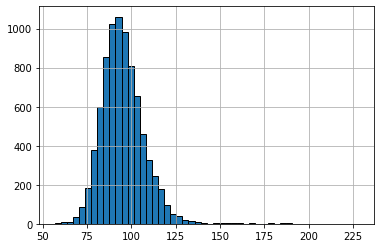

In [32]:
cgm_mean = CGMLoader().get_data(study_ids=study_ids).df.reset_index().groupby('RegistrationCode')['GlucoseValue'].mean()
cgm_mean.hist(bins=50, edgecolor='black')

plt.show()

## UltrasoundLoader

Ultrasound loader contains data from liver ultrasound that is taken during the meetings
df_columns_metadata is present

In [36]:
us_df = UltrasoundLoader().get_data(study_ids=study_ids).df \
    .join(UltrasoundLoader().get_data(study_ids=study_ids).df_metadata[['research_stage']])

us_df['att_liver'] = us_df[['att_plus_ssp_plus_db_cm_mhz_1_att_plus', 'att_plus_ssp_plus_db_cm_mhz_2_att_plus',
                            'att_plus_ssp_plus_db_cm_mhz_3_att_plus']].mean(axis=1)

us_df['att_liver'].describe()

count    8284.000000
mean        0.412750
std         0.103914
min         0.207333
25%         0.336667
50%         0.400333
75%         0.475333
max         1.130000
Name: att_liver, dtype: float64

## ABILoader

ABI Loader contains abi (ankle brachial index measurements )
https://www.hopkinsmedicine.org/health/treatment-tests-and-therapies/ankle-brachial-index-test#:~:text=Health%20care%20providers%20calculate%20ABI,in%20his%20or%20her%20legs.

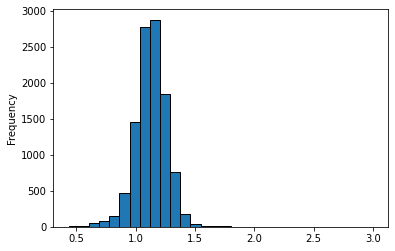

In [69]:
abi_df = ABILoader().get_data(study_ids=study_ids).df \
    .join(ABILoader().get_data(study_ids=study_ids).df_metadata[['research_stage', 'age', 'yob']])

abi_df['abi'] = abi_df[['l_abi', 'r_abi']].mean(axis=1)
abi_df['abi'].plot(kind='hist', bins=30, edgecolor='black')
plt.show()

In [72]:
abi_df[['abi', 'yob', 'age']].loc['10K_2869902522']

,abi,yob,age
Date,,,
2019-01-29 15:57:14.161179,1.630,1973.0,46.0
2021-08-15 11:58:47.758527,1.105,1973.0,48.0


## ItamarSleepLoader 

ItamarSleepLoader contains the data from the sleep monitroring devices
AHI apnea hapopnea index - https://www.webmd.com/sleep-disorders/sleep-apnea/sleep-apnea-ahi-numbers

In [48]:
sleep_df = ItamarSleepLoader().get_data(study_ids=study_ids).df \
    .join(ItamarSleepLoader().get_data(study_ids=study_ids).df_metadata[['research_stage']])


sleep_df =sleep_df[['research_stage', 'AHI']].reset_index()
sleep_df = sleep_df.groupby(['RegistrationCode', 'research_stage'])['AHI'].mean().reset_index()


ahi_dic = [5, 15]

sleep_df['AHI'] =sleep_df['AHI'].apply(lambda x: define_the_range(x, ahi_dic))
sleep_df['AHI'].value_counts()

intermediate    3356
normal          2652
abnormal        1967
Name: AHI, dtype: int64

## MedicalConditionLoader

MedicalConditionLoader contains medical conditions reported throught the surveys and to the coordinators in the clinic

the date is approximation of the start of the condition,  the main data is ICD11 code (df_columns_metadata contains translation of this ICD11 code)

In [51]:
medical_condition = MedicalConditionLoader().get_data(study_ids=study_ids).df
medical_condition_columns_metadata = MedicalConditionLoader().get_data(study_ids=study_ids).df_columns_metadata
medical_condition.head(3)

Start
RegistrationCode Date       medical_condition       
10K_8843698074   2018-01-01 GB20.0              True
10K_3774586502   1960-01-01 CA23                True
                 2018-01-01 GA90                True

In [53]:
medical_condition_columns_metadata.head(5)

,column_id,english_name,ICD11Code,Block,Descriptive Code,column_name,Unnamed: 6,hebrew_name,needs_clarification,Call-Question,"Return 1, call 2, no response 3",Consolidated name,Group
0,condition001,Genital warts,1A95.1,NaN,NaN,1A95.1,0.0,קונדילומה אקומינטה מחודדת,NaN,NaN,3.0,NaN,NaN
1,condition002,Whooping cough due to Bordetella pertussis,1C12.0,NaN,NaN,1C12.0,0.0,שעלת,NaN,NaN,2.0,NaN,NaN
2,condition003,Infectious mononucleosis,1D81,NaN,NaN,1D81,0.0,מחלת הנשיקה,NaN,NaN,2.0,NaN,NaN
3,condition004,"Cytomegaloviral disease, unspecified",1D82.Z,NaN,XN3SQ,1D82.z,0.0,מחלת CMV ללא פירוט,NaN,NaN,2.0,NaN,NaN
4,condition005,Chronic hepatitis B,1E51.0,NaN,XN0GA,1E51.0,0.0,נשא צהבת B,1.0,Is it only Ab due to vaccination or chronic he...,2.0,NaN,NaN


## MedicalProceduresLoader

MedicalProceduresLoader contains mediations reported throught the surveys and to the coordinators in the clinic

the date is approximation of the start of the treatment, the main data is CPT code (df_columns_metadata contains translation of this CPT code)


In [56]:
medical_procedures = MedicalProceduresLoader().get_data(study_ids=study_ids).df
medical_procedures_columns_metadata = MedicalProceduresLoader().get_data(study_ids=study_ids).df_columns_metadata
medical_procedures.head(3)

,,,is_good_result
RegistrationCode,Date,medical_procedure,
10K_4624150077,2021-02-01,66983.0,NaN
10K_6553781403,2021-03-01,66983.0,NaN
10K_4015460567,2020-01-01,929.0,NaN


In [57]:
medical_procedures_columns_metadata.head(5)

,column_id,column_name,3 letter CPT,5 letter CPT code,english_name,hebrew_name,Unnamed: 6,Unnamed: 7,Call-Question,Call-Answers,...,Unnamed: 16374,Unnamed: 16375,Unnamed: 16376,Unnamed: 16377,Unnamed: 16378,Unnamed: 16379,Unnamed: 16380,Unnamed: 16381,Unnamed: 16382,Unnamed: 16383
0,procedure1,90749,NaN,90749.0,corona vaccine,חיסון קורונה,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,procedure2,929,929.0,NaN,cardiac catheterization,צנתור לבבי,NaN,NaN,diagnostic/intrervention? If intervention: whi...,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,procedure3,92920,929.0,92920.0,pci angiography,צנתור אבחנתי,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,procedure4,92924,929.0,92924.0,cardiac catheterization with atherectomy,צנתור לבבי עם פתיחה מכאנית,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,procedure5,92928,929.0,92928.0,cardiac catheterization with stent placement,צנתור לבבי עם הנחת סטנט,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


## Medications10KLoader


Medications10KLoader contains mediations reported throught the surveys and to the coordinators in the clinic

the date is approximation of the start of the treatment, the main data is medication name (df_columns_metadata contains translation from the name to the generic and to ATC code)


In [58]:
medications = Medications10KLoader().get_data(study_ids=study_ids).df
medications_columns_metadata = Medications10KLoader().get_data(study_ids=study_ids).df_columns_metadata
medications.head(3)

Unprocessed medications in metadata - more than defined threshold of 3
column_name
וסיקר / Vesicare            5
יסמין / Yasmin              5
נאורונטין / Neurontin       4
אלפו-קל XL / Alfu-Kal XL    4
אלפאגן / Alphagan P         4
קוסופט / Cosopt             4
קיי-ציטק / K-Citek          4
וולטרן / Voltaren           4
פמארל / femarelle           4
אוטריווין / Otrivin         4
סינומל / Cynomel            4
גסטרו / Gastro              4
די־טאבס / D-Tabs            4
dtype: int64
Unprocessed medications in metadata - more than defined threshold of 3
column_name
וסיקר / Vesicare            5
יסמין / Yasmin              5
נאורונטין / Neurontin       4
אלפו-קל XL / Alfu-Kal XL    4
אלפאגן / Alphagan P         4
קוסופט / Cosopt             4
קיי-ציטק / K-Citek          4
וולטרן / Voltaren           4
פמארל / femarelle           4
אוטריווין / Otrivin         4
סינומל / Cynomel            4
גסטרו / Gastro              4
די־טאבס / D-Tabs            4
dtype: int64


,,,Start
RegistrationCode,Date,medication,
10K_6990364275,2022-01-30 07:49:42.032670,נקסיום / Nexium,True
10K_6922624426,2022-01-30 18:04:38.268588,אטוזט / Atozet,True
10K_5703053962,2022-01-30 20:28:57.912330,אלטרוקסין / Eltroxin,True


In [59]:
medications_columns_metadata.head(3)

,column_id,column_name,PARSED,Generic,ATC,Expanded Generic,Expanded ATC,Conditions,ICD11,ATC4,GroupName,Description
0,medication0001,לא נוטל תרופות / No Medications Taking,False,EMPTY,EMPTY,NaN,NaN,NaN,NaN,EMPTY,NaN,NaN
1,medication0002,ויטמין D / Vitamin D,True,Vitamin D and analogues,A11CC,NaN,NaN,Low bone mass disorders,FB83,A11CC,Vitamin D and analogues,NaN
2,medication0003,יוטירוקס / Euthyrox,True,Levothyroxine,H03AA01,NaN,NaN,Hypothyroidism,5A00,H03AA,Thyroid hormones,NaN


In [6]:
DEXALoader().get_data(study_ids=[10, 1001, 1002]).df.join(DEXALoader().get_data(study_ids=[10, 1001, 1002]).df_metadata[['age', 'yob', 'gender']]).to_csv('/net/mraid08/export/genie/LabData/Data/10K/for_review/all_dexa_data.csv')

[]
[]
